In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# ??LabelEncoder
le = LabelEncoder()

In [8]:
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

In [9]:
data.sex.head()

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int32

In [10]:
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

In [11]:
data.smoker.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

In [12]:
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [13]:
data.region.value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int32
region      1338 non-null int32
charges     1338 non-null float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [16]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

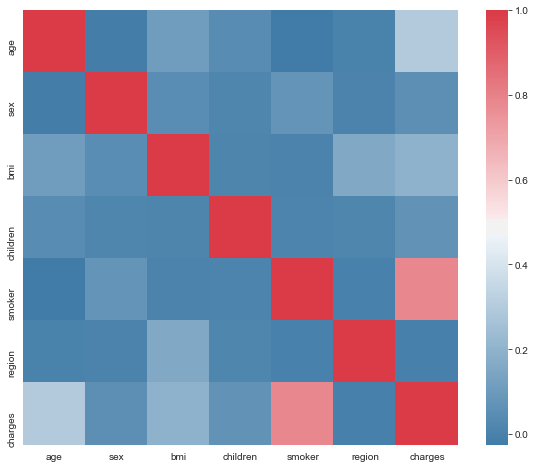

In [17]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

> First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

In [29]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
# show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))
# plt.show()

Loading BokehJS ...

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

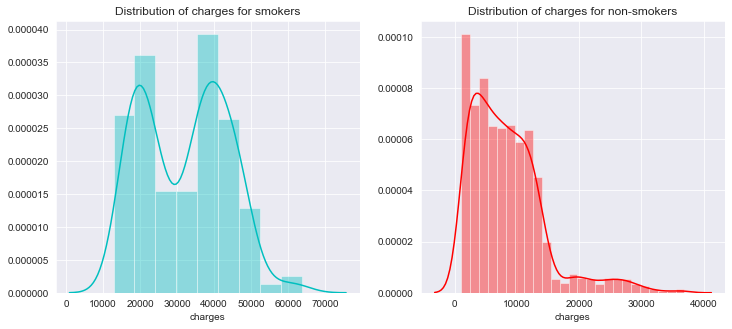

In [35]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='r',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

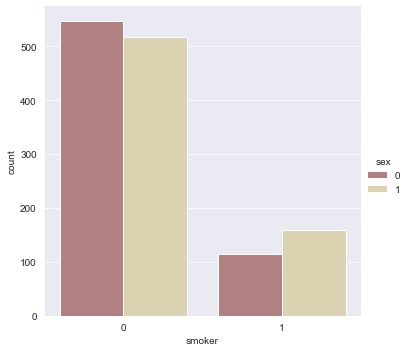

In [38]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

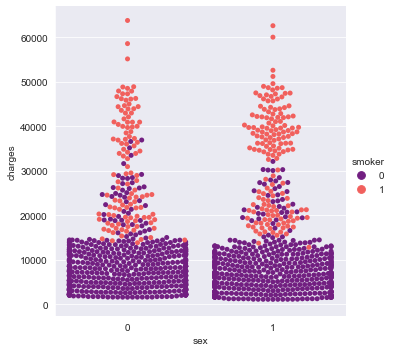

In [42]:
sns.catplot(x="sex", y="charges", hue="smoker",kind="swarm", data=data, palette = 'magma')

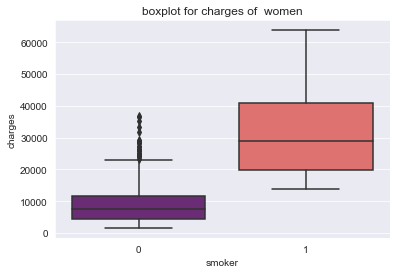

In [54]:
sns.boxplot(x='smoker',y = 'charges',data=data[(data.sex==0)],palette = 'magma')
plt.title('boxplot for charges of  women')
plt.show()

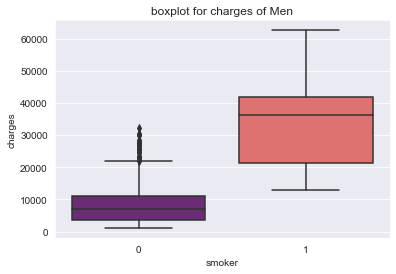

In [53]:
sns.boxplot(x='smoker',y = 'charges',data=data[(data.sex==1)],palette = 'magma')
plt.title('boxplot for charges of Men')
plt.show()

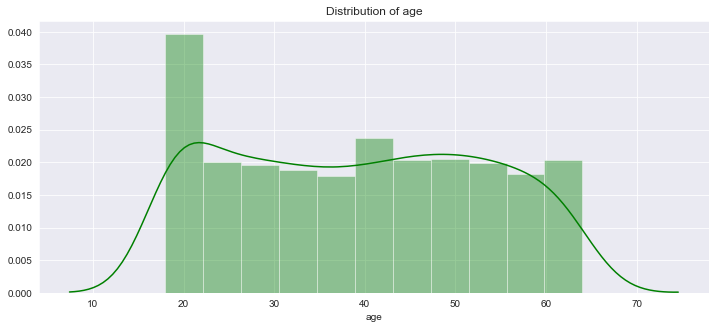

In [56]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

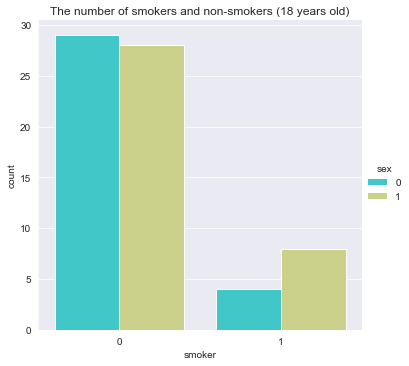

In [58]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

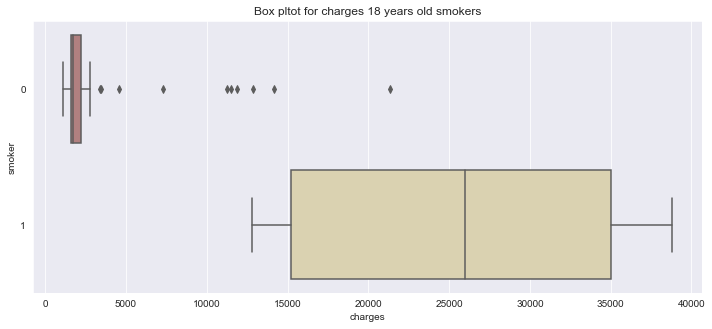

In [64]:
plt.figure(figsize=(12,5))
plt.title("Box pltot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1, 'Smokers and non-smokers')

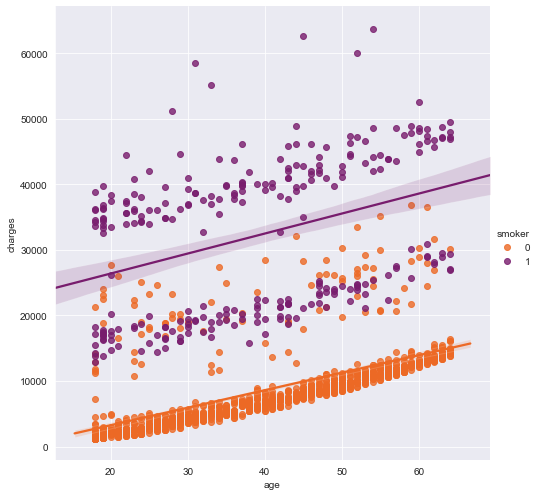

In [69]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

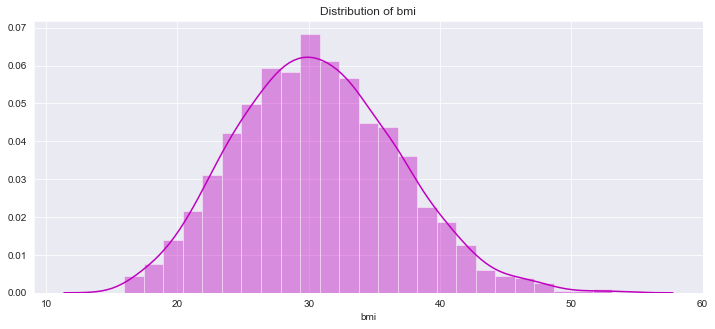

In [70]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

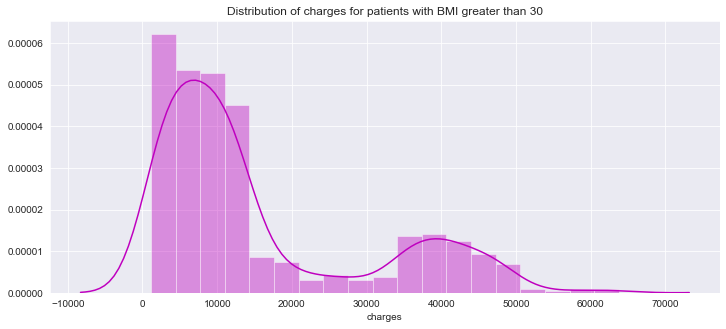

In [72]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

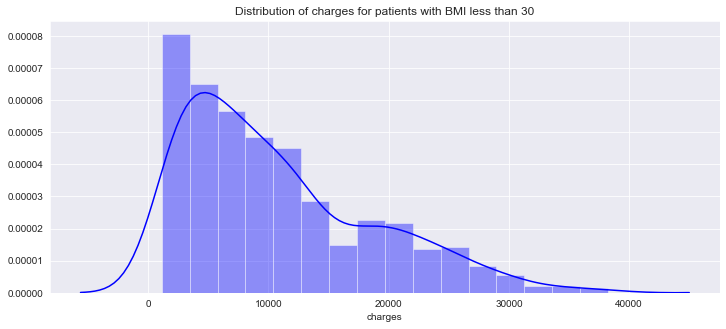

In [74]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

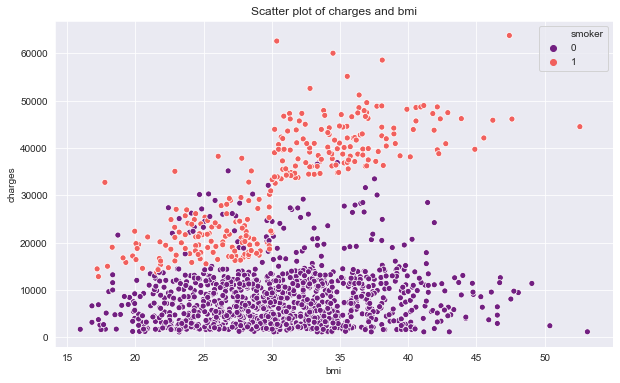

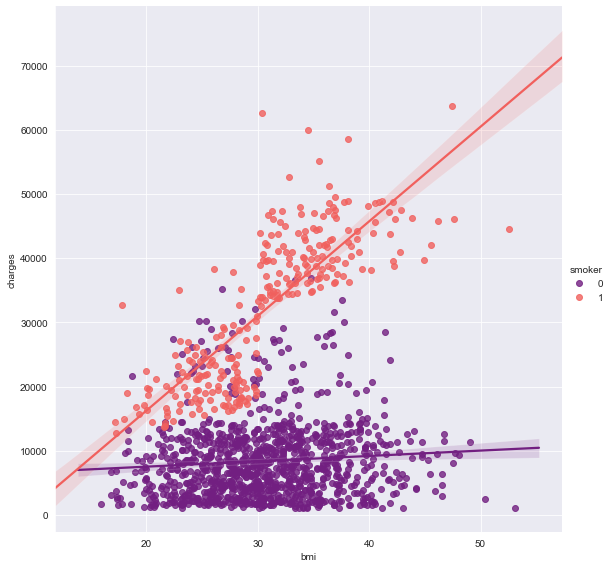

In [76]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

> Smokers are spending more irrespective of BMI but Non- smokers are paying linearly to their BMI

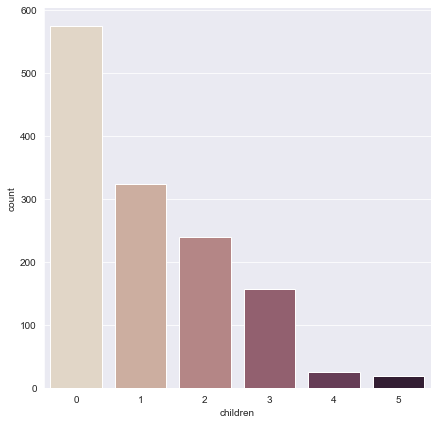

In [77]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Text(0.5, 1, 'Smokers and non-smokers who have childrens')

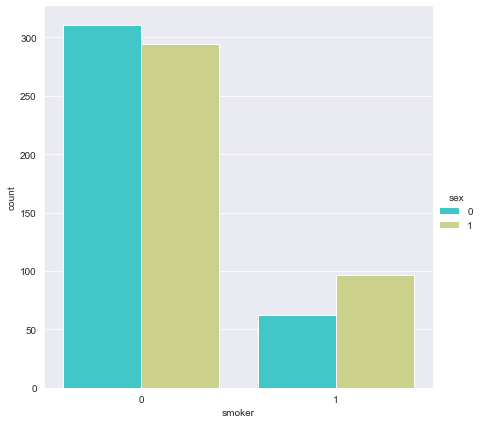

In [78]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

> Let's apply Linear Regression ... 

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [80]:
x = data.drop(['charges'], axis = 1)
y = data.charges

xt,XT,yt,YT = train_test_split(x,y)

In [82]:
lr = LinearRegression().fit(xt,yt)

ytp = lr.predict(xt)
YTP = lr.predict(XT)

In [83]:
print(lr.score(xt,yt))

0.7634287784987932


* Normalisation is needed to get the good results

In [85]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

* Polynomial regression

In [88]:
X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8846283666147681


In [90]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(xt,yt)
forest_train_pred = forest.predict(xt)
forest_test_pred = forest.predict(XT)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(yt,forest_train_pred),
mean_squared_error(YT,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(yt,forest_train_pred),
r2_score(YT,forest_test_pred)))

MSE train data: 3203833.490, MSE test data: 28317069.807
R2 train data: 0.978, R2 test data: 0.814


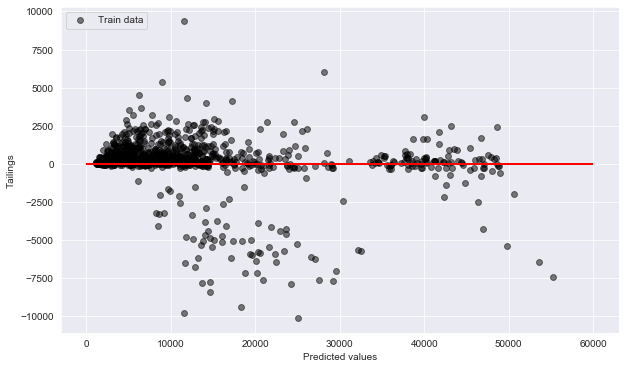

In [94]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - yt,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - YT,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

> Thank You |